## Importing libraries

In [75]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

## Importing dataset

In [60]:
data_df = pd.read_csv('real_estate.csv', index_col=False)
data_df[:5]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [61]:
data_df.rename(columns={'X1 transaction date': 'trans_date', 'X2 house age':'house_age', 
                        'X3 distance to the nearest MRT station':'mrt_distance',
                        'X4 number of convenience stores':'no_of_convenience_stores', 
                        'X5 latitude':'latitude', 
                        'X6 longitude':'longitude', 
                        'Y house price of unit area' : 'house_price'}, inplace = True)
data_df

,No,trans_date,house_age,mrt_distance,no_of_convenience_stores,latitude,longitude,house_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [62]:
data_df.describe()

,No,trans_date,house_age,mrt_distance,no_of_convenience_stores,latitude,longitude,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [63]:
data_df.info

<bound method DataFrame.info of       No  trans_date  house_age  mrt_distance  no_of_convenience_stores  \
0      1    2012.917       32.0      84.87882                        10   
1      2    2012.917       19.5     306.59470                         9   
2      3    2013.583       13.3     561.98450                         5   
3      4    2013.500       13.3     561.98450                         5   
4      5    2012.833        5.0     390.56840                         5   
..   ...         ...        ...           ...                       ...   
409  410    2013.000       13.7    4082.01500                         0   
410  411    2012.667        5.6      90.45606                         9   
411  412    2013.250       18.8     390.96960                         7   
412  413    2013.000        8.1     104.81010                         5   
413  414    2013.500        6.5      90.45606                         9   

     latitude  longitude  house_price  
0    24.98298  121.54024   

## Define x and y 


In [81]:
x = data_df.drop(['house_price'], axis=1).values
y = data_df['house_price'].values


## Split the data into training set and test set

In [112]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=1/3, random_state=6)

## Train the model on the training set

In [113]:
ml = LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [114]:
y_pred = ml.predict(X_test)
y_pred

array([45.36962662,  3.69270903, 41.63801016, 29.39059018,  9.35328814,
       31.93502247, 26.86703379, 46.06199875, 35.76866529, 39.17958401,
       43.70604652, 11.73300399, 49.15676531, 30.37385106, 40.59365228,
       35.3718447 , 34.16095734, 43.63873219, 25.57678601, 40.47738102,
       33.97881014, 35.74489361, 47.75918447, 46.73370638, 43.23781395,
       14.61132158, 37.20628077, 41.98951822, 24.42856328, 40.61312877,
       39.5556784 , 23.30367603, 31.01725227, 49.34385214, 11.94918896,
       33.97918369, 32.58388641, 48.63461333, 47.2568521 , 46.15073041,
       43.02065853, 45.18548985, 43.95445517, 29.60848249, 38.4597289 ,
       33.7127233 , 30.41193562, 45.75273992, 44.16794235, -2.41308253,
       43.71472867, 37.75938383,  6.44822249, 48.13273445, 41.14926577,
       44.33619599, 36.85782329, 46.693468  , 52.3227571 , 46.34827034,
       10.2217135 , 46.82085274, 31.67578319, 40.6164767 , 51.56491531,
       33.32056584, 37.54782458, 46.10395438, 46.1203229 , 24.42

In [115]:
ml.predict([[1,2012.917,32.0,84.87882,10,24.98298,121.54024]])

array([46.51478493])

In [116]:
ml.predict([[5,2012.833,5.0,390.56840,5,24.97937,121.54245]])


array([46.693468])

## Evaluate Model

In [117]:
r2_score(y_test,y_pred)

0.5544505986570141

## Plotting Results

Text(0.5, 1.0, 'Actual Vs Predicted')

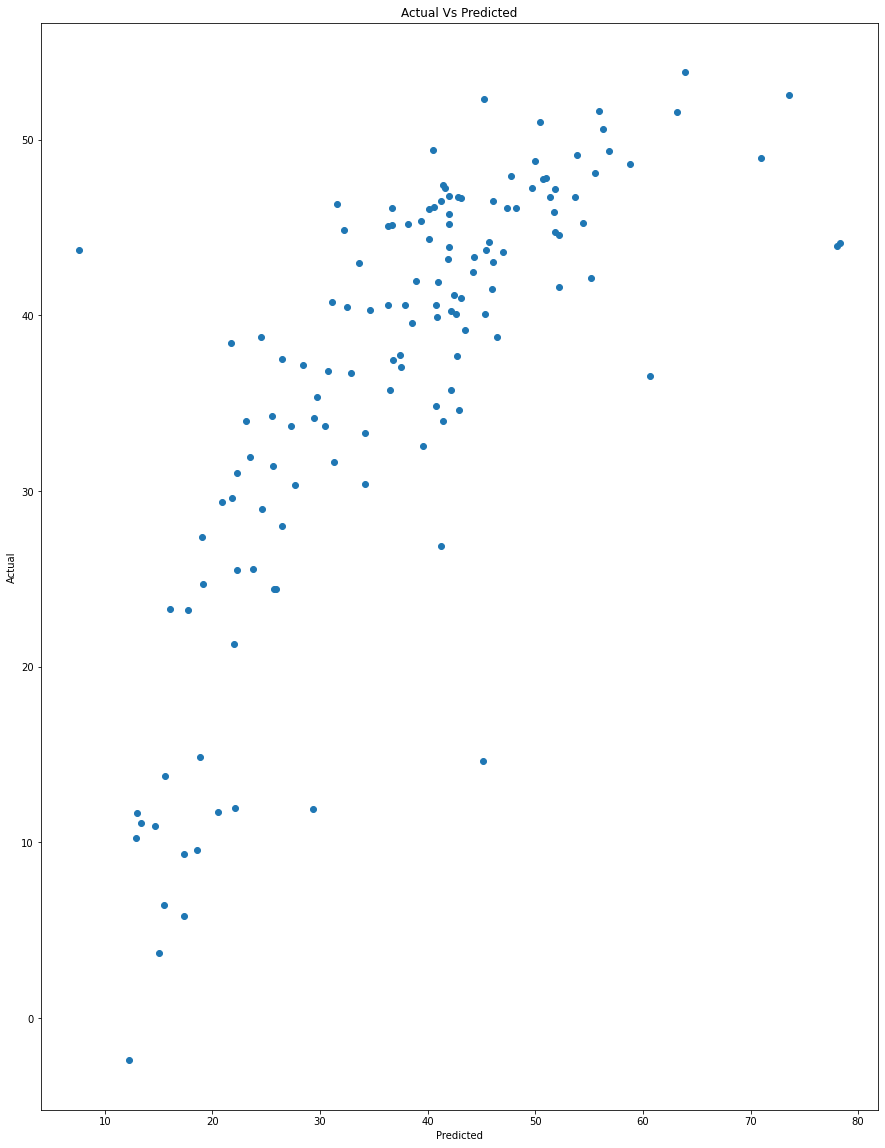

In [122]:
plt.figure(figsize=(15,20))
plt.scatter(y_test, y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual Vs Predicted')

In [131]:
df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'Difference' : y_test-y_pred})
df.head()

,y_test,y_pred,Difference
0,39.4,45.369627,-5.969627
1,15.0,3.692709,11.307291
2,52.2,41.638010,10.561990
3,20.9,29.390590,-8.490590
4,17.4,9.353288,8.046712


<AxesSubplot:>

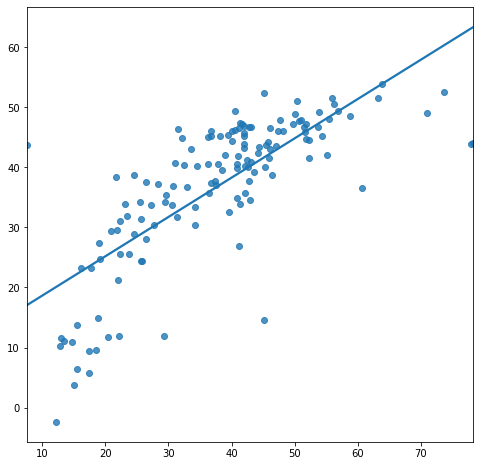

In [134]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_test, y=y_pred, data=df, ci=False)